<a href="https://colab.research.google.com/github/mdegnan200/MiniProject3/blob/main/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Here is where the data dictionary is and the dataset

# Here are the requirements provided by instructor: 
The capstone project involves an analysis of the students’ choosing related to their field of interest or current industry, creating visualizations (static) using relevant data, and presentation to their classmates. 
Your project should abide by the following guidelines:
Describe your motivation for performing this analysis.
Describe your data sources.
Project includes multiple data transformations (example: converting columns to different data types, etc.).
Project includes at least one statistical analysis and one graphic that supports your data.
One graph that supports your conclusions.
Each section of your project should be accompanied by an explanation. For example, 1-2 sentences explaining what is happening in that section or graph – so the reader understands your journey and the data story being told.
Presentation: 5-7 minutes.
Presentation: did the audience come away with a clear understanding of why you undertook this project?
Presentation: did the audience come away with a clear understanding of one insight or conclusion you’ve found?
Delivered code should run without errors.
Code should be hosted on GitHub.


# Requirements as interpreted by me
Used Python to clean data and Tableau for visualizations.  Determined Data Eements that are important to review are Age, Gender, Title, Country, Salary, Programming Language, Level of Education.  
Kaggle Data Set is here:  https://www.kaggle.com/code/kailex/education-languages-and-salary/data


**Importing My Libraries and my Dataset.**  Since I am inporting into my Collab notebook (using the folder function on the left) I need to import every time I re-open.   

In [30]:
import pandas as pd
df = pd.read_csv ('Data Scientist Education and Salary.csv')
df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0,3,7,19,34,47,49,50,51,52,53,54,68,81,94,96,109,115,130,139,147,154,167,180,193,206,219,232,245) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,NaN,NaN,NaN,NaN,NaN,Azure SQL Database,NaN,NaN,NaN,-1


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

#Let's see what this dataset looks like.
How many columns.  How many rows.  What are the data types.  WOW.  Lots of uneeded data.  


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19718 entries, 0 to 19717
Columns: 246 entries, Time from Start to Finish (seconds) to Q34_OTHER_TEXT
dtypes: object(246)
memory usage: 37.0+ MB


In [33]:
df.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
count,19718,19718,19718,19718,19718,19324,19108,19718,14003,13624,...,1853,1193,548,589,416,480,527,1246,288,19718
unique,5305,12,5,49,60,8,13,961,6,8,...,2,2,2,2,2,2,2,2,2,168
top,450,25-29,Male,-1,India,Master’s degree,Data Scientist,-1,0-49 employees,20+,...,Microsoft SQL Server,Oracle Database,Microsoft Access,AWS Relational Database Service,AWS DynamoDB,Azure SQL Database,Google Cloud SQL,None,Other,-1
freq,36,4458,16138,15583,4786,8549,4085,14605,4025,3178,...,1852,1192,547,588,415,479,526,1245,287,15439


#Too much data, Cannot get all the info I would like to see.  Let's skinny it down by selecting ONLY the columns I am interested in.


In [34]:
df2 = df[['Q1','Q2','Q3','Q4','Q5','Q6','Q10','Q14','Q15', 'Q16_Part_1','Q18_Part_1','Q20_Part_2']]
df2.head(10)


,Q1,Q2,Q3,Q4,Q5,Q6,Q10,Q14,Q15,Q16_Part_1,Q18_Part_1,Q20_Part_2
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,What is your current yearly compensation (appr...,What is the primary tool that you use at work ...,How long have you been writing code to analyze...,Which of the following integrated development ...,What programming languages do you use on a reg...,What data visualization libraries or tools do ...
1,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees","30,000-39,999","Basic statistical software (Microsoft Excel, G...",1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib
2,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees","5,000-7,499","Cloud-based data software & APIs (AWS, GCP, Az...",I have never written code,NaN,NaN,NaN
3,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees","250,000-299,999","Local development environments (RStudio, Jupyt...",1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib
5,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,"4,000-4,999","Local development environments (RStudio, Jupyt...",< 1 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib
6,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,"60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)",20+ years,NaN,Python,NaN
7,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,"10,000-14,999","Local development environments (RStudio, Jupyt...",3-5 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees","80,000-89,999","Local development environments (RStudio, Jupyt...",3-5 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib
9,22-24,Male,United States of America,Bachelor’s degree,Student,NaN,NaN,"Local development environments (RStudio, Jupyt...",3-5 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib


# Much better - Only 12 columns to deal with.  Now lets think about 'cleaning' the data.  Only keeping the rows that make sense to keep.    But before we do that, let's rename the columns so I do not forget what the data really is. 

In [35]:
df3 = df2.rename(columns={'Q1':'Age','Q2':'Gender','Q3':'Country','Q4': 'Highest Degree','Q5': 'Title','Q6':'Company Size','Q10':'Yearly Salary','Q14':'Primary Tool', 'Q15':'Code Experience','Q16_Part_1': 'integrated development environment','Q18_Part_1':'Programming Tool','Q20_Part_2':'Visualization Library'})
df3.head(10)

,Age,Gender,Country,Highest Degree,Title,Company Size,Yearly Salary,Primary Tool,Code Experience,integrated development environment,Programming Tool,Visualization Library
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,What is your current yearly compensation (appr...,What is the primary tool that you use at work ...,How long have you been writing code to analyze...,Which of the following integrated development ...,What programming languages do you use on a reg...,What data visualization libraries or tools do ...
1,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees","30,000-39,999","Basic statistical software (Microsoft Excel, G...",1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib
2,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees","5,000-7,499","Cloud-based data software & APIs (AWS, GCP, Az...",I have never written code,NaN,NaN,NaN
3,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40-44,Male,Australia,Master’s degree,Other,"> 10,000 employees","250,000-299,999","Local development environments (RStudio, Jupyt...",1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib
5,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,"4,000-4,999","Local development environments (RStudio, Jupyt...",< 1 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib
6,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,"60,000-69,999","Advanced statistical software (SPSS, SAS, etc.)",20+ years,NaN,Python,NaN
7,22-24,Male,India,Master’s degree,Data Scientist,50-249 employees,"10,000-14,999","Local development environments (RStudio, Jupyt...",3-5 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib
8,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"> 10,000 employees","80,000-89,999","Local development environments (RStudio, Jupyt...",3-5 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib
9,22-24,Male,United States of America,Bachelor’s degree,Student,NaN,NaN,"Local development environments (RStudio, Jupyt...",3-5 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib


# To clean the data, I would like to skinny down the rows that have data in my important columns. I do not want 'null' data to skew my results.  Age, Gender and Country must have been mandatory because they are all populated.  Will drop any rows that have null in Highest Degree, Title and Yearly Salary.  I check the row counts after each cleaning.  

In [36]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19718 entries, 0 to 19717
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 19718 non-null  object
 1   Gender                              19718 non-null  object
 2   Country                             19718 non-null  object
 3   Highest Degree                      19324 non-null  object
 4   Title                               19108 non-null  object
 5   Company Size                        14003 non-null  object
 6   Yearly Salary                       12498 non-null  object
 7   Primary Tool                        15691 non-null  object
 8   Code Experience                     15628 non-null  object
 9   integrated development environment  10805 non-null  object
 10  Programming Tool                    12842 non-null  object
 11  Visualization Library               10517 non-null  ob

In [37]:
df3 = df3[(df3['Highest Degree'].notnull())]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19324 entries, 0 to 19717
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 19324 non-null  object
 1   Gender                              19324 non-null  object
 2   Country                             19324 non-null  object
 3   Highest Degree                      19324 non-null  object
 4   Title                               19108 non-null  object
 5   Company Size                        14003 non-null  object
 6   Yearly Salary                       12498 non-null  object
 7   Primary Tool                        15691 non-null  object
 8   Code Experience                     15628 non-null  object
 9   integrated development environment  10805 non-null  object
 10  Programming Tool                    12842 non-null  object
 11  Visualization Library               10517 non-null  ob

In [38]:
df3['Calculated Salary'] = 0
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19324 entries, 0 to 19717
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 19324 non-null  object
 1   Gender                              19324 non-null  object
 2   Country                             19324 non-null  object
 3   Highest Degree                      19324 non-null  object
 4   Title                               19108 non-null  object
 5   Company Size                        14003 non-null  object
 6   Yearly Salary                       12498 non-null  object
 7   Primary Tool                        15691 non-null  object
 8   Code Experience                     15628 non-null  object
 9   integrated development environment  10805 non-null  object
 10  Programming Tool                    12842 non-null  object
 11  Visualization Library               10517 non-null  ob

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
df3 = df3[(df3['Title'].notnull())]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19108 entries, 0 to 19717
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 19108 non-null  object
 1   Gender                              19108 non-null  object
 2   Country                             19108 non-null  object
 3   Highest Degree                      19108 non-null  object
 4   Title                               19108 non-null  object
 5   Company Size                        14003 non-null  object
 6   Yearly Salary                       12498 non-null  object
 7   Primary Tool                        15691 non-null  object
 8   Code Experience                     15628 non-null  object
 9   integrated development environment  10805 non-null  object
 10  Programming Tool                    12842 non-null  object
 11  Visualization Library               10517 non-null  ob

In [40]:
df3 = df3[(df3['Yearly Salary'].notnull())]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12498 entries, 0 to 19717
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 12498 non-null  object
 1   Gender                              12498 non-null  object
 2   Country                             12498 non-null  object
 3   Highest Degree                      12498 non-null  object
 4   Title                               12498 non-null  object
 5   Company Size                        12498 non-null  object
 6   Yearly Salary                       12498 non-null  object
 7   Primary Tool                        11453 non-null  object
 8   Code Experience                     11423 non-null  object
 9   integrated development environment  7816 non-null   object
 10  Programming Tool                    9364 non-null   object
 11  Visualization Library               7508 non-null   ob

# Yearly Salary is a range and cannot be used for averaging.  Creating a Calculated Salary for all the ranges.  Any salary under 10K got assigned a Calucalted Salary = 0.  

In [41]:


df3.loc[df3['Yearly Salary'] == '0-999', 'Calculated Salary'] = 0
df3.loc[df3['Yearly Salary'] == '1,000-1,999', 'Calculated Salary'] = 0
df3.loc[df3['Yearly Salary'] == '2,000-2,999', 'Calculated Salary'] = 0
df3.loc[df3['Yearly Salary'] == '3,000-3,999', 'Calculated Salary'] = 0
df3.loc[df3['Yearly Salary'] == '4,000-4,999', 'Calculated Salary'] = 0
df3.loc[df3['Yearly Salary'] == '5,000-7,499', 'Calculated Salary'] = 0
df3.loc[df3['Yearly Salary'] == '7,500-9,999', 'Calculated Salary'] = 0
df3.loc[df3['Yearly Salary'] == '10,000-14,999', 'Calculated Salary'] = 15000
df3.loc[df3['Yearly Salary'] == '15,000-19,999', 'Calculated Salary'] = 20000
df3.loc[df3['Yearly Salary'] == '20,000-24,999', 'Calculated Salary'] = 25000
df3.loc[df3['Yearly Salary'] == '25,000-29,999', 'Calculated Salary'] = 30000
df3.loc[df3['Yearly Salary'] == '30,000-39,999', 'Calculated Salary'] = 40000
df3.loc[df3['Yearly Salary'] == '40,000-49,999', 'Calculated Salary'] = 50000
df3.loc[df3['Yearly Salary'] == '50,000-59,999', 'Calculated Salary'] = 60000
df3.loc[df3['Yearly Salary'] == '60,000-69,999', 'Calculated Salary'] = 70000
df3.loc[df3['Yearly Salary'] == '70,000-79,999', 'Calculated Salary'] = 80000
df3.loc[df3['Yearly Salary'] == '80,000-89,999', 'Calculated Salary'] = 90000
df3.loc[df3['Yearly Salary'] == '90,000-99,999', 'Calculated Salary'] = 100000
df3.loc[df3['Yearly Salary'] == '100,000-124,999', 'Calculated Salary'] = 125000
df3.loc[df3['Yearly Salary'] == '125,000-149,999', 'Calculated Salary'] = 150000
df3.loc[df3['Yearly Salary'] == '150,000-199,999', 'Calculated Salary'] = 200000
df3.loc[df3['Yearly Salary'] == '200,000-249,999', 'Calculated Salary'] = 250000
df3.loc[df3['Yearly Salary'] == '250,000-299,999', 'Calculated Salary'] = 300000
df3.loc[df3['Yearly Salary'] == '300,000-500,000', 'Calculated Salary'] = 500000
df3.loc[df3['Yearly Salary'] == '> $500,000', 'Calculated Salary'] = 500001
df3.head(3)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Age,Gender,Country,Highest Degree,Title,Company Size,Yearly Salary,Primary Tool,Code Experience,integrated development environment,Programming Tool,Visualization Library,Calculated Salary
0,What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,What is your current yearly compensation (appr...,What is the primary tool that you use at work ...,How long have you been writing code to analyze...,Which of the following integrated development ...,What programming languages do you use on a reg...,What data visualization libraries or tools do ...,0
1,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees","30,000-39,999","Basic statistical software (Microsoft Excel, G...",1-2 years,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",Python,Matplotlib,40000
2,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees","5,000-7,499","Cloud-based data software & APIs (AWS, GCP, Az...",I have never written code,NaN,NaN,NaN,0


# Getting rid of Header row.  I confirm that I got rid of it since I see that 1 less row in in df3.  

In [42]:
df3 = df3[(df3['Age'] != 'What is your age (# years)?')]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12497 entries, 1 to 19717
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 12497 non-null  object
 1   Gender                              12497 non-null  object
 2   Country                             12497 non-null  object
 3   Highest Degree                      12497 non-null  object
 4   Title                               12497 non-null  object
 5   Company Size                        12497 non-null  object
 6   Yearly Salary                       12497 non-null  object
 7   Primary Tool                        11452 non-null  object
 8   Code Experience                     11422 non-null  object
 9   integrated development environment  7815 non-null   object
 10  Programming Tool                    9363 non-null   object
 11  Visualization Library               7507 non-null   ob

In [43]:
df3.groupby(['Yearly Salary']).count()

,Age,Gender,Country,Highest Degree,Title,Company Size,Primary Tool,Code Experience,integrated development environment,Programming Tool,Visualization Library,Calculated Salary
Yearly Salary,,,,,,,,,,,,
$0-999,1513,1513,1513,1513,1513,1513,1289,1282,824,998,829,1513
"1,000-1,999",599,599,599,599,599,599,508,506,321,399,317,599
"10,000-14,999",833,833,833,833,833,833,770,766,535,640,543,833
"100,000-124,999",750,750,750,750,750,750,704,703,487,583,422,750
"125,000-149,999",483,483,483,483,483,483,461,460,329,392,286,483
"15,000-19,999",529,529,529,529,529,529,505,505,332,406,327,529
"150,000-199,999",434,434,434,434,434,434,406,406,278,345,263,434
"2,000-2,999",390,390,390,390,390,390,348,346,224,265,226,390
"20,000-24,999",526,526,526,526,526,526,487,485,356,403,334,526


# Confirming the totals in Calculated Salary to make sure my calculations were correct.  Plan to drop the 4400 Calculated Salary of '0'.

In [44]:
df3.groupby(['Calculated Salary']).count()

,Age,Gender,Country,Highest Degree,Title,Company Size,Yearly Salary,Primary Tool,Code Experience,integrated development environment,Programming Tool,Visualization Library
Calculated Salary,,,,,,,,,,,,
0,4040,4040,4040,4040,4040,4040,4040,3539,3523,2345,2811,2332
15000,833,833,833,833,833,833,833,770,766,535,640,543
20000,529,529,529,529,529,529,529,505,505,332,406,327
25000,526,526,526,526,526,526,526,487,485,356,403,334
30000,482,482,482,482,482,482,482,453,453,322,388,323
40000,728,728,728,728,728,728,728,681,681,496,571,474
50000,719,719,719,719,719,719,719,679,677,462,556,443
60000,704,704,704,704,704,704,704,654,654,455,557,435
70000,576,576,576,576,576,576,576,539,537,371,446,351


In [45]:
df3.describe()

,Calculated Salary
count,12497.000000
mean,56544.377291
std,77620.341112
min,0.000000
25%,0.000000
50%,30000.000000
75%,80000.000000
max,500001.000000


# I see a problem with the salary.  Looks like some of the Yearly salaries are not correct.  I will cull out any salary under $10K a year because I believe it to be bad data.  Since I set the Calculated Salary = 0 for any Yearly Salary under 10K, I will select only if Calculated Salary GT 0.  This will drop 4040 rows on N/A data. Notice how the Average Salary increases. 

In [46]:
df3 = df3[(df3['Calculated Salary'] != 0)]
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8457 entries, 1 to 19717
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Age                                 8457 non-null   object
 1   Gender                              8457 non-null   object
 2   Country                             8457 non-null   object
 3   Highest Degree                      8457 non-null   object
 4   Title                               8457 non-null   object
 5   Company Size                        8457 non-null   object
 6   Yearly Salary                       8457 non-null   object
 7   Primary Tool                        7913 non-null   object
 8   Code Experience                     7899 non-null   object
 9   integrated development environment  5470 non-null   object
 10  Programming Tool                    6552 non-null   object
 11  Visualization Library               5175 non-null   obj

# I can see that I did drop the 4400 rows and the average salary went from 56K to 83K.  

In [47]:
df3.describe()

,Calculated Salary
count,8457.000000
mean,83556.235426
std,81523.920145
min,15000.000000
25%,30000.000000
50%,60000.000000
75%,100000.000000
max,500001.000000


# Now I am going to do some analysis using group by so I can see counts by the various measures:  Gender, Country, Highest Degree and Title.  

In [48]:
df3.groupby(['Gender','Calculated Salary']).count()

Age  Country  Highest Degree  \
Gender                  Calculated Salary                                 
Female                  15000              118      118             118   
                        20000               76       76              76   
                        25000               63       63              63   
                        30000               64       64              64   
                        40000               88       88              88   
...                                        ...      ...             ...   
Prefer to self-describe 90000                1        1               1   
                        125000               2        2               2   
                        150000               1        1               1   
                        200000               3        3               3   
                        500001               3        3               3   

                                           Title  Company Size  Yearly Salary  \
Gender                  Calculated Salary                                       
Female                  15000                118           118            118   
                        20000                 76            76             76   
                        25000                 63            63             63   
                        30000                 64            64             64   
                        40000                 88            88             88   
...                                          ...           ...            ...   
Prefer to self-describe 90000                  1             1              1   
                        125000                 2             2              2   
                        150000                 1             1              1   
                        200000                 3             3              3   
                        500001                 3             3              3   

                                           Primary Tool  Code Experience  \
Gender                  Calculated Salary                                  
Female                  15000                       107              107   
                        20000                        73               73   
                        25000                        53               53   
                        30000                        62               62   
                        40000                        81               81   
...                                                 ...              ...   
Prefer to self-describe 90000                         1                1   
                        125000                        2                2   
                        150000                        1                1   
                        200000                        3                3   
                        500001                        3                3   

                                           integrated development environment  \
Gender                  Calculated Salary                                       
Female                  15000                                              72   
                        20000                                              46   
                        25000                                              37   
                        30000                                              44   
                        40000                                              55   
...                                                                       ...   
Prefer to self-describe 90000                                               1   
                        125000                                              2   
                        150000                                              1   
                        200000                                              2   
                        500001                      

In [49]:
df3.groupby(['Country']).count()

,Age,Gender,Highest Degree,Title,Company Size,Yearly Salary,Primary Tool,Code Experience,integrated development environment,Programming Tool,Visualization Library,Calculated Salary
Country,,,,,,,,,,,,
Algeria,6,6,6,6,6,6,6,6,3,5,3,6
Argentina,67,67,67,67,67,67,63,63,50,52,42,67
Australia,193,193,193,193,193,193,178,178,98,129,90,193
Austria,38,38,38,38,38,38,35,35,24,29,18,38
Bangladesh,16,16,16,16,16,16,13,13,7,8,5,16
Belarus,25,25,25,25,25,25,25,25,21,24,22,25
Belgium,51,51,51,51,51,51,50,50,37,43,32,51
Brazil,314,314,314,314,314,314,300,300,220,252,185,314
Canada,276,276,276,276,276,276,250,250,163,207,171,276


In [50]:
df3.groupby(['Highest Degree','Calculated Salary']).count()

Age  \
Highest Degree                                     Calculated Salary        
Bachelor’s degree                                  15000              280   
                                                   20000              156   
                                                   25000              144   
                                                   30000              125   
                                                   40000              147   
...                                                                   ...   
Some college/university study without earning a... 200000              17   
                                                   250000               5   
                                                   300000               1   
                                                   500000               2   
                                                   500001               2   

                                                                      Gender  \
Highest Degree                                     Calculated Salary           
Bachelor’s degree                                  15000                 280   
                                                   20000                 156   
                                                   25000                 144   
                                                   30000                 125   
                                                   40000                 147   
...                                                                      ...   
Some college/university study without earning a... 200000                 17   
                                                   250000                  5   
                                                   300000                  1   
                                                   500000                  2   
                                                   500001                  2   

                                                                      Country  \
Highest Degree                                     Calculated Salary            
Bachelor’s degree                                  15000                  280   
                                                   20000                  156   
                                                   25000                  144   
                                                   30000                  125   
                                                   40000                  147   
...                                                                       ...   
Some college/university study without earning a... 200000                  17   
                                                   250000                   5   
                                                   300000                   1   
                                                   500000                   2   
                                                   500001                   2   

                                                                      Title  \
Highest Degree                                     Calculated Salary          
Bachelor’s degree                                  15000                280   
                                                   20000                156   
                                                   25000                144   
                                                   30000                125   
                                                   40000                147   
...                                                                     ...   
Some college/university study without earning a... 200000                17   
                                                   250000                 5   
                                                   300000                 1   
                                                   500000                 2   
                         

In [51]:
df3.groupby(['Title','Calculated Salary']).count()

Age  Gender  Country  Highest Degree  \
Title            Calculated Salary                                         
Business Analyst 15000               55      55       55              55   
                 20000               40      40       40              40   
                 25000               36      36       36              36   
                 30000               30      30       30              30   
                 40000               49      49       49              49   
...                                 ...     ...      ...             ...   
Statistician     150000               8       8        8               8   
                 200000               6       6        6               6   
                 250000               5       5        5               5   
                 500000               2       2        2               2   
                 500001               4       4        4               4   

                                    Company Size  Yearly Salary  Primary Tool  \
Title            Calculated Salary                                              
Business Analyst 15000                        55             55            50   
                 20000                        40             40            37   
                 25000                        36             36            33   
                 30000                        30             30            28   
                 40000                        49             49            47   
...                                          ...            ...           ...   
Statistician     150000                        8              8             7   
                 200000                        6              6             6   
                 250000                        5              5             5   
                 500000                        2              2             2   
                 500001                        4              4             3   

                                    Code Experience  \
Title            Calculated Salary                    
Business Analyst 15000                           50   
                 20000                           37   
                 25000                           33   
                 30000                           28   
                 40000                           47   
...                                             ...   
Statistician     150000                           7   
                 200000                           6   
                 250000                           5   
                 500000                           2   
                 500001                           3   

                                    integrated development environment  \
Title            Calculated Salary                                       
Business Analyst 15000                                              30   
                 20000                                              17   
                 25000                                              21   
                 30000                                              15   
                 40000                                              28   
...                                                                ...   
Statistician     150000                                              3   
                 200000                                              4   
                 250000                                              1   
                 500000                                              1   
                 500001                                              1   

                                    Programming Tool  Visualization Library  
Title            Calculated Salary                                           
Business Analyst 15000                            34                     29  
                 20000                            24                     19  
  

# Lastly I am going to look at some visualizations in Python.  I realize that I will do most of my visualizations in Tableau since I like all the flexibility there ... and the pretty colors.  

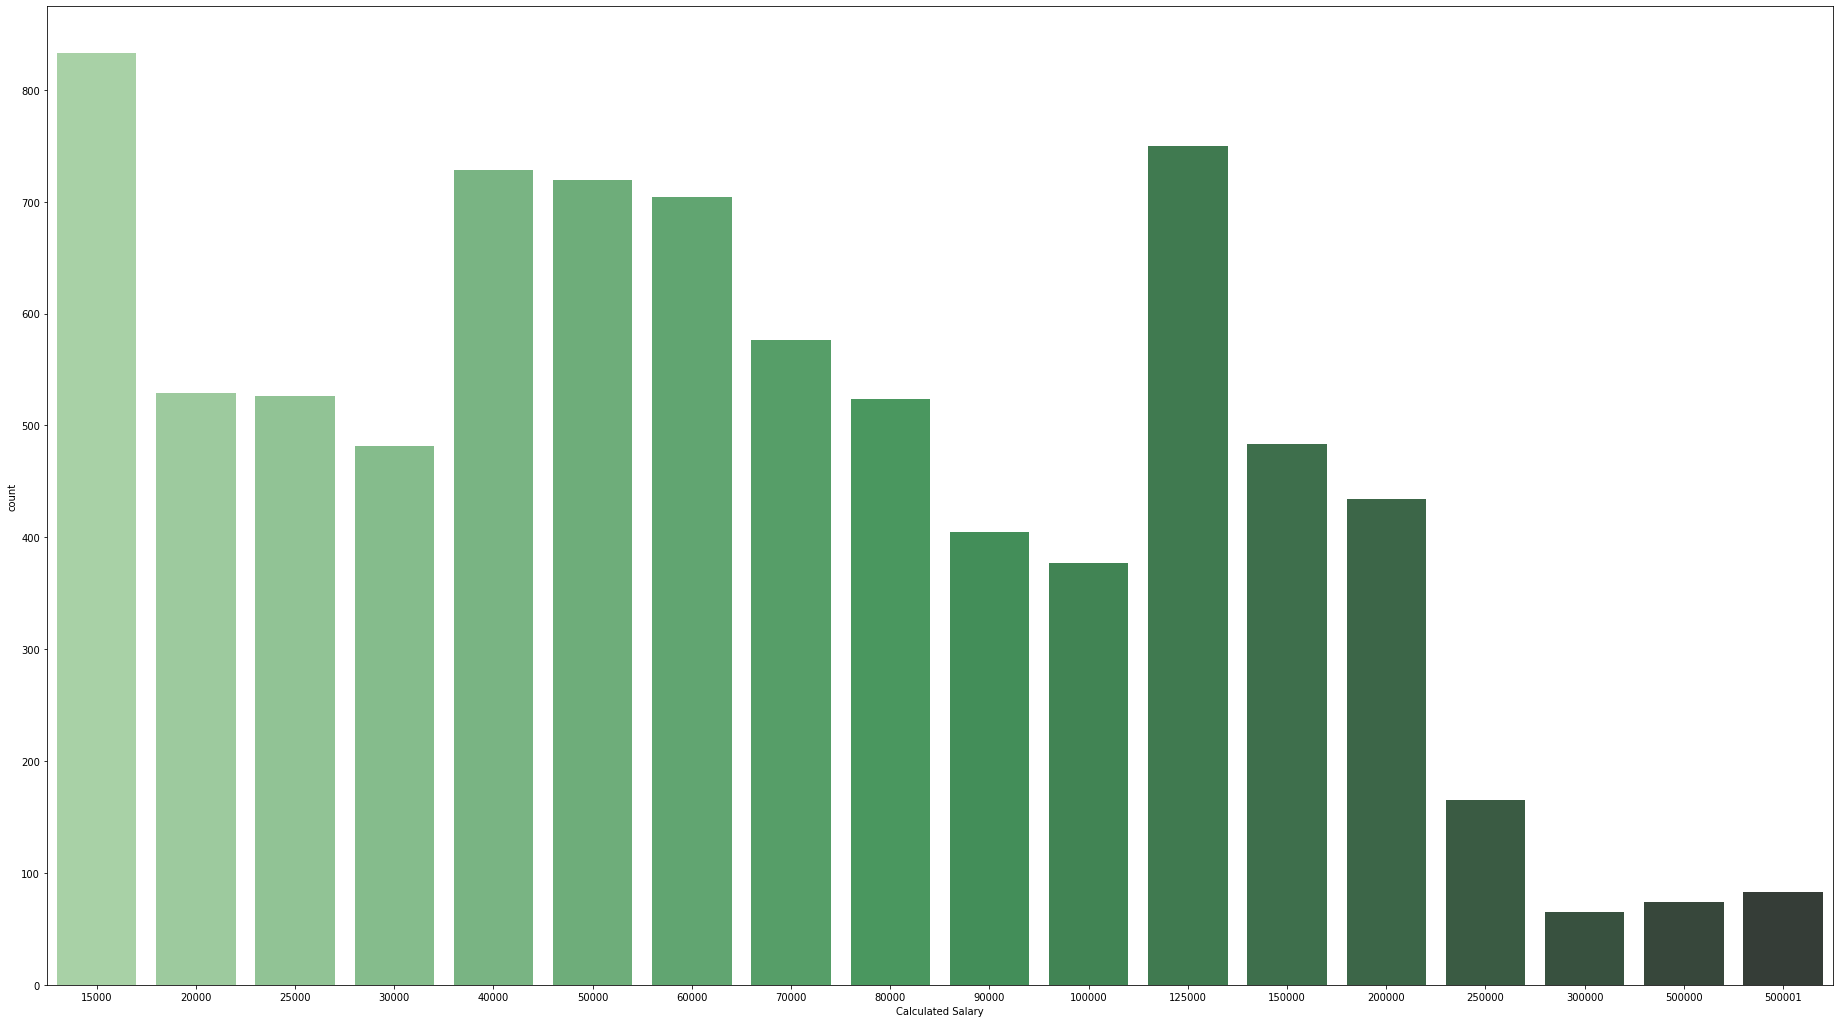

In [52]:
 plt.figure(figsize=(32,18))
 sns.countplot(x="Calculated Salary", data=df3, palette="Greens_d")

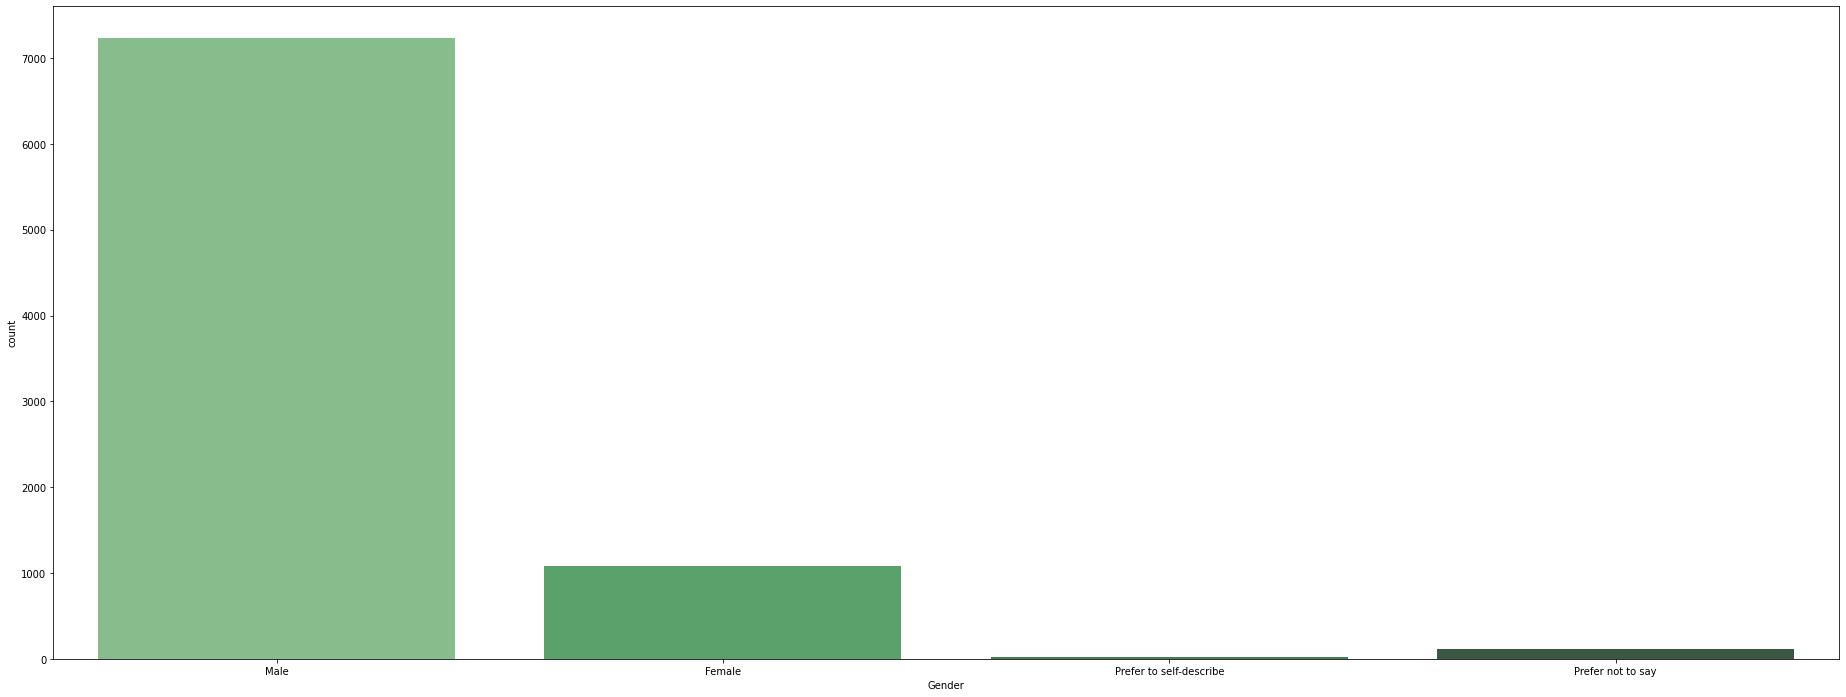

In [53]:
 plt.figure(figsize=(32,12))
 sns.countplot(x="Gender", data=df3, palette="Greens_d")

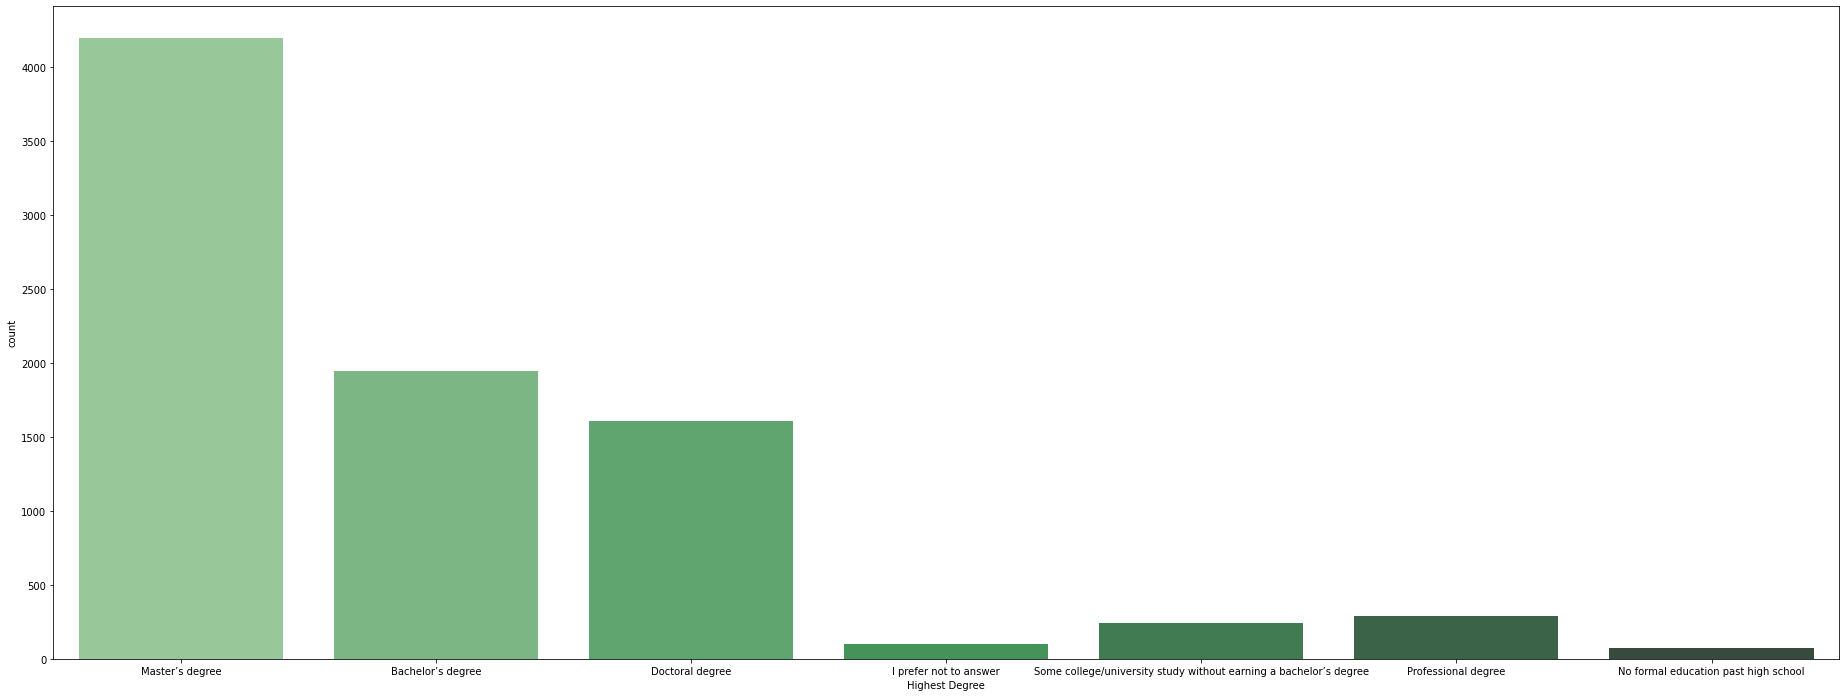

In [54]:
 plt.figure(figsize=(32,12))
 sns.countplot(x="Highest Degree", data=df3, palette="Greens_d")

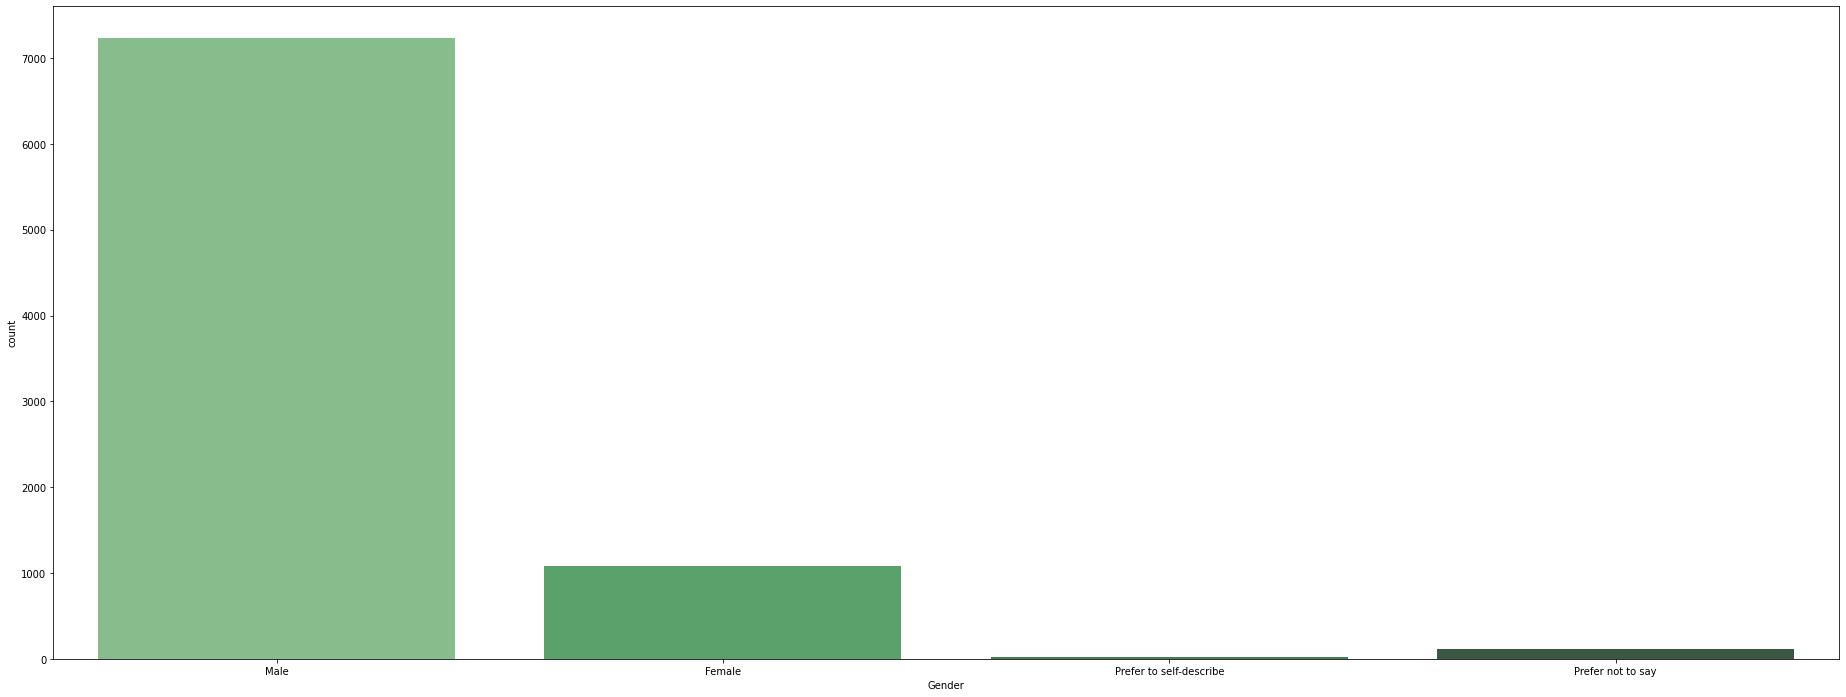

In [55]:
 plt.figure(figsize=(32,12))
 sns.countplot(x="Gender", data=df3, palette="Greens_d")

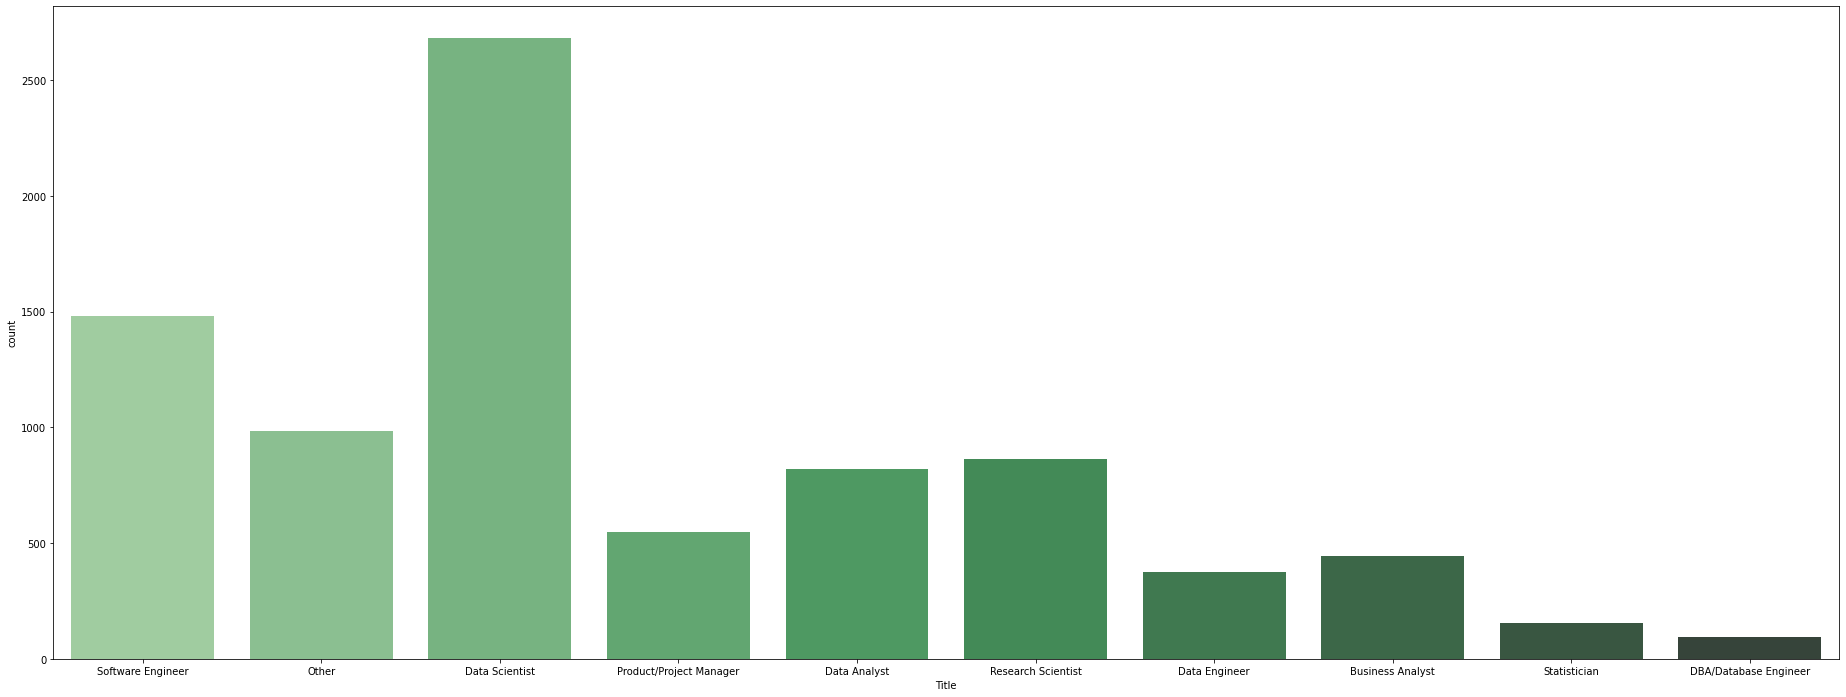

In [56]:
 plt.figure(figsize=(32,12))
 sns.countplot(x="Title", data=df3, palette="Greens_d")

# Saving DataFrame to Excel so I can import into Tableau

In [57]:
df3.to_excel (r'C:\Users\mdegnan\Documents\Data for Class\export_dataframe.xlsx', index = False, header=True)